## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [3]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [4]:
# Checking the number of mice.
mice_num = df["Mouse ID"].nunique()
mice_num

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = df[df[["Mouse ID", "Timepoint"]].duplicated()]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
# The duplicated Mouse ID is g989
mouse_g989 = df.loc[df["Mouse ID"] == "g989", :]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != "g989", :]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_num = clean_df["Mouse ID"].nunique()
mice_num

248

## Summary Statistics

In [12]:
clean_df.groupby("Drug Regimen").mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_groupby = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Mean of the tumor volume for each drug regimen
mean_volume = tumor_groupby.mean()

# Median of the tumor volume for each drug regimen
median_volume = tumor_groupby.median()

# Variance of the tumor volume for each drug regimen
var_volume = tumor_groupby.var()

# standard deviation of the tumor volume for each drug regimen
std_volume = tumor_groupby.std()

# SEM of the tumor volume for each drug regimen
sem_volume = tumor_groupby.sem()

# Assemble the resulting series into a single summary dataframe.
# tumor_volume_df = pd.DataFrame({"Mean": mean_volume.map("{:.2f}".format),
#                                "Median": median_volume.map("{:.2f}".format),
#                                "Variance": var_volume.map("{:.2f}".format),
#                                "Standard Deviation": std_volume.map("{:.2f}".format),
#                                "Standard Error": sem_volume.map("{:.2f}".format)})
tumor_volume_df = pd.DataFrame({"Mean": mean_volume,
                               "Median": median_volume,
                               "Variance": var_volume,
                               "Standard Deviation": std_volume,
                               "Standard Error": sem_volume})
tumor_volume_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_df = pd.DataFrame({"Mean": mean_volume,
                               "Median": median_volume,
                               "Variance": var_volume,
                               "Standard Deviation": std_volume,
                               "Standard Error": sem_volume})
tumor_volume_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_groupby.aggregate(['mean', 'median','var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [21]:
timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count()
timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

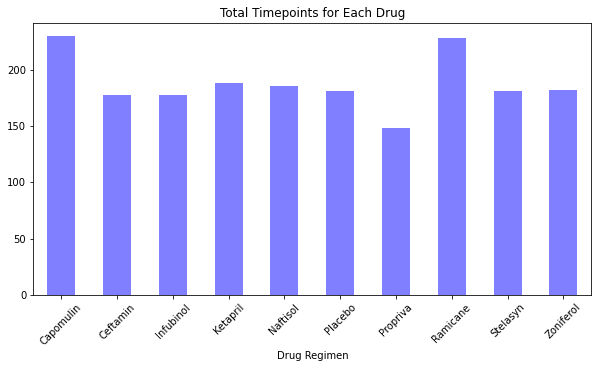

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count()

timepoints.plot(kind='bar', figsize=(10,5), color='blue', alpha = 0.5, rot='45',title='Total Timepoints for Each Drug')
plt.show()

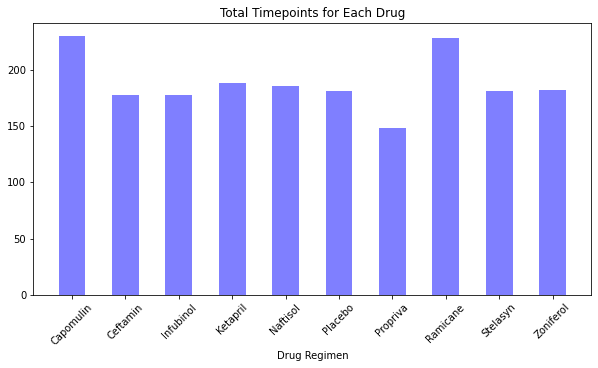

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count().reset_index()
plt.figure(figsize=(10,5))
plt.bar(timepoints['Drug Regimen'], timepoints['Timepoint'], 0.5, color='blue',alpha=0.5)
plt.title('Total Timepoints for Each Drug')
plt.xlabel("Drug Regimen")
plt.tick_params('x', rotation=45)
plt.show()


In [33]:
clean_df.groupby("Sex")["Mouse ID"].count().reset_index()

,Sex,Mouse ID
0,Female,922
1,Male,958


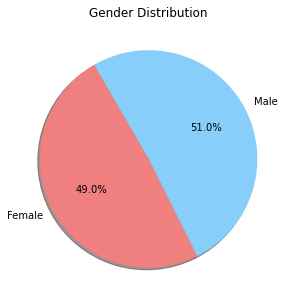

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# generate a dataframe for gender
gender_df = clean_df.groupby("Sex")["Mouse ID"].count().reset_index()
gender_df = gender_df.rename(columns={"Mouse ID":"Gender"})
# define graph parameters
labels = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]

gender_df.plot(y="Gender", kind="pie",figsize=(5,5), labels=labels, colors=colors,
                   autopct="%1.1f%%", shadow=True, legend=False, ylabel='', title="Gender Distribution", startangle=120)

plt.show()

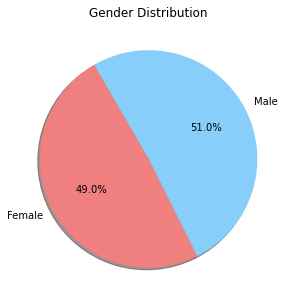

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = [0,0]
labels = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]
plt.figure(figsize=(5,5))
plt.pie(gender_df["Gender"], explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# put the data for the 4 drugs in a new dataframe called "drugs_df"
drugs_df = clean_df.loc[clean_df.isin({'Drug Regimen': drugs})["Drug Regimen"],:]
drugs_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [41]:
drugs_test = clean_df.loc[clean_df["Drug Regimen"].isin(drugs),:]
drugs_test

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [ ]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs_df.groupby("Mouse ID").max("Timepoint")["Timepoint"].reset_index()
last_timepoint

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_last_df = pd.merge(drugs_df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
tumor_last_df

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
